# 🏠 Hands-On Machine Learning: California Housing Prices

This notebook walks through building, evaluating, and deploying machine learning models for predicting California housing prices.

In [ ]:
# STEP 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

## 📊 About the Dataset
The **California Housing dataset** contains information about housing in California districts in the 1990s.
- **Features**:
  - `MedInc`: Median income in block group (in tens of thousands of dollars).
  - `HouseAge`: Median house age in block group.
  - `AveRooms`: Average number of rooms per household.
  - `AveBedrms`: Average number of bedrooms per household.
  - `Population`: Block group population.
  - `AveOccup`: Average household members.
  - `Latitude`, `Longitude`: Location of the block group.
- **Target**:
  - `MedHouseVal`: Median house value (in 100,000s of dollars).

This makes it a **regression problem** where we predict continuous values.

## 📌 Step 2: Load the Dataset
The **California Housing dataset** includes features like income, house age, average rooms, latitude/longitude, etc. The target is **median house value**.

In [ ]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 📌 Train, Validation, and Test Splits
We split our dataset into subsets:
- **Training set**: Used to fit the model.
- **Validation set**: Used to tune hyperparameters and prevent overfitting. Here, we use cross-validation implicitly.
- **Test set**: Held back for final unbiased evaluation of model performance.

In this workflow, we split the data into **80% training** and **20% testing**. For validation, we could use cross-validation on the training set if we tune hyperparameters.

## 📌 Step 3: Split Features and Target
We separate features (X) from target (y).

In [ ]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 📌 Step 4: Data Scaling
We scale features for models like Linear Regression.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 📌 Step 5: Train Models
### Linear Regression & Random Forest

### ℹ️ About the Models
- **Linear Regression**: Assumes a linear relationship between features and target. Works best if relationships are roughly straight lines.
- **Random Forest Regressor**: An ensemble of decision trees. Captures non-linear patterns, robust to outliers, usually performs better for tabular datasets.

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_pred_lin = lin_model.predict(X_test_scaled)

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

## 📌 Step 6: Evaluate Models

In [ ]:
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))

print(f"Linear Regression RMSE: {rmse_lin:.4f}")
print(f"Random Forest RMSE: {rmse_forest:.4f}")

Linear Regression RMSE: 0.7456
Random Forest RMSE: 0.5053


### 📝 Interpreting Results
- **RMSE (Root Mean Squared Error)**: Lower is better. Represents the average prediction error in the same unit as the target (house value in $100,000s).
- Linear Regression will likely have higher RMSE due to complex, non-linear relationships in housing prices.
- Random Forest is expected to achieve lower RMSE because it handles non-linearities and interactions between features.

## 📌 Step 7: Visualizations

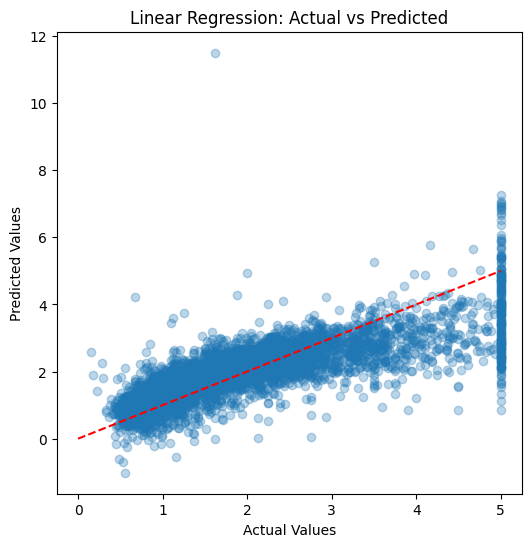

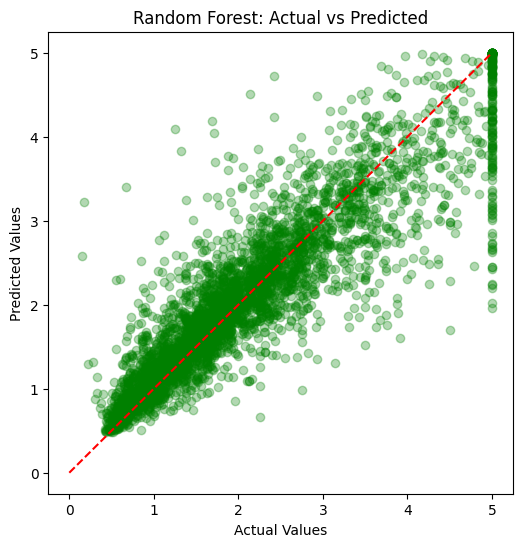

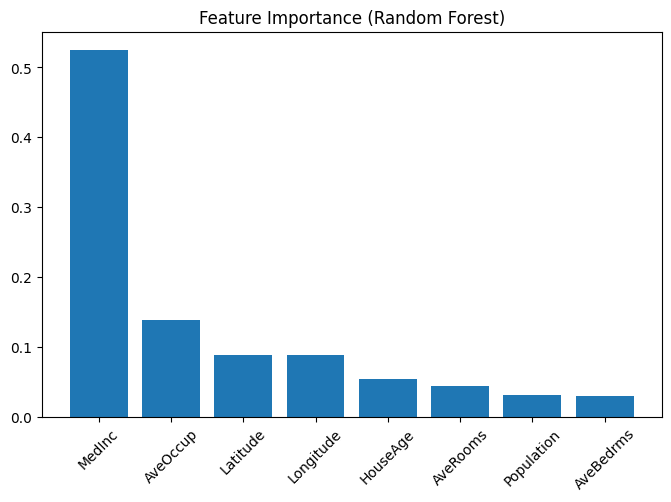

In [ ]:
# Linear Regression scatter
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([0, 5], [0, 5], "r--")
plt.show()

# Random Forest scatter
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_forest, alpha=0.3, color="green")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([0, 5], [0, 5], "r--")
plt.show()

# Feature importance
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.show()

## 📌 Step 8: Save & Load Model

In [ ]:
joblib.dump(forest_model, "random_forest_model.pkl")
loaded_model = joblib.load("random_forest_model.pkl")
y_pred_loaded = loaded_model.predict(X_test)
rmse_loaded = np.sqrt(mean_squared_error(y_test, y_pred_loaded))
print(f"Loaded Model RMSE: {rmse_loaded:.4f}")

Loaded Model RMSE: 0.5053


## 📌 Step 10: Hyperparameter Tuning with Grid Search

So far, we manually set parameters for Random Forest. Instead, we can use **GridSearchCV** to systematically search for the best parameters.

- **n_estimators**: Number of trees in the forest.
- **max_depth**: Maximum depth of each tree.
- **min_samples_split**: Minimum samples required to split an internal node.
- **min_samples_leaf**: Minimum samples required at a leaf node.
- **max_features**: Number of features to consider when looking for the best split.

Grid Search will try all combinations and use **cross-validation** to evaluate performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py",

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 0.5011124413691342


### 📝 Interpretation of Grid Search Results
- **Best Parameters**: The parameter combination that gave the lowest RMSE during cross-validation.
- **Best CV RMSE**: The expected performance of the model with those parameters.

After finding the best parameters, you can retrain the Random Forest on the full training set with those parameters for optimal performance.